In [242]:
import nltk
from bs4 import BeautifulSoup

## Branje podatkov

In [243]:
def read_from_file():
    data = []
    f = open("../data/novice.txt", "r", encoding="utf-8")
    title = ""
    body = ""
    comments = []
    for line in f:
        line = line.replace("\n", "")
        if line == "":
            data.append( (title, body, comments) )
            title = ""
            body = ""
            comments = []
        elif title == "":
            title = line
        elif body == "":
            body = line
        else:
            comments.append(line)
    return data

In [244]:
news = read_from_file()

## Lematizacija

Klic programa za lematizacijo. Lematiziramo naslove, telo novic in komentarje.

0: uspešno

1: neuspešno

In [245]:
import os
f_title = open("../ObeliksLatest/in_title.txt", "w", encoding="utf-8")
f_body = open("../ObeliksLatest/in_body.txt", "w", encoding="utf-8")
f_comment = open("../ObeliksLatest/in_comment.txt", "w", encoding="utf-8")
for n in news:
    f_title.write(n[0] + "\n\n")
    f_body.write(n[1] + "\n\n")
    for c in n[2]:
        f_comment.write(c + "\n\n")
    f_comment.write("DELIMITER\n\n")
f_title.close()
f_body.close()
f_comment.close()
os.chdir("../ObeliksLatest")
os.system("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t in_title.txt TaggerModel.bin out_title.xml")
os.system("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t in_body.txt TaggerModel.bin out_body.xml")
os.system("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t in_comment.txt TaggerModel.bin out_comment.xml")

0

Branje lematiziranih besed.

In [247]:
def read_lemmatized(path):
    f  = open(path, "r", encoding="utf-8").read()
    soup = BeautifulSoup(f, "lxml")
    lemmatized = []
    lemmas = soup.find_all("p")
    for i in range(0, len(lemmas), 1):
        lem = []
        for l in lemmas[i].find_all("w"):
            lem.append(l["lemma"])
        lemmatized.append(lem)
    #print(lemmatized)
    result = []
    for news in lemmatized:
        result.append(" ".join([str(x) for x in news]))
    return result

def read_lemmatized_comments(path):
    f  = open(path, "r", encoding="utf-8").read()
    soup = BeautifulSoup(f, "lxml")
    result = []
    lemmatized = []
    lemmas = soup.find_all("p")
    for i in range(0, len(lemmas), 1):
        lem = ""
        skip = False
        for l in lemmas[i].find_all("w"):
            #print(l["lemma"])
            if l["lemma"].lower() == "delimiter":
                result.append(lemmatized)
                lemmatized = []
                skip = True
            else:
                lem += l["lemma"] + " "
        if skip:
            skip = False
        else:
            lemmatized.append(lem)
    return result

titles_lemmatized = read_lemmatized("../ObeliksLatest/out_title.xml")
body_lemmatized = read_lemmatized("../ObeliksLatest/out_body.xml")
comments_lemmatized = read_lemmatized_comments("../ObeliksLatest/out_comment.xml")
print(len(titles_lemmatized))
print(len(body_lemmatized))
print(len(comments_lemmatized))

62
62
62


## Testiranje sentimenta

In [291]:
import os
def read_words(path):
    result = []
    f = open(path, "r", encoding="utf-8")
    for line in f:
        result.append(line.replace("\n", ""))
    os.chdir("../ObeliksLatest")
    #print("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t " + path.split("ObeliksLatest/")[1] + " TaggerModel.bin out.xml")
    os.system("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t " + path.split("ObeliksLatest/")[1] + " TaggerModel.bin out.xml")
    # Also lemmatize those words and include them in result
    lem = read_lemmatized("../ObeliksLatest/out.xml")
        
    return lem

positive_words = read_words("../ObeliksLatest/Sentiment/pozitivni_clean.txt") 
negative_words = read_words("../ObeliksLatest/Sentiment/negativni_clean.txt")
#positive_words = read_words("../ObeliksLatest/Sentiment/pozitivni_novi_preverjeni.txt") 
#negative_words = read_words("../ObeliksLatest/Sentiment/negativni_novi_preverjeni.txt")

# DUPLICATE CHECK - no output ok
for w in positive_words:
    if w in negative_words:
        print(w)

In [385]:
import math
# words - array of words
def sentiment_score(words):
    score = 0
    pos = 0
    neg = 0
    for w in words:
        if w in negative_words:
            score -= 1
            neg += 1
            #print("-" + w)
        if w in positive_words:
            score += 1
            pos += 1
            #print("+ " + w)
    #news_sentiment.append(100*score/len(words))
    #return int(100*score/len(words))
    #return math.log(pos + 0.5) - math.log(neg + 0.5)
    #if pos+neg==0:
    #    return 0
    #return score/float(pos+neg)
    return score

### Izračunamo sentiment novic in izpišemo naslov novice z najnižjim sentimentom.

In [386]:
news_sentiment = []
for news_body in body_lemmatized:
    words = news_body.split(" ")
    score = sentiment_score(words)
    news_sentiment.append(score)
print(news_sentiment)
#print(body_lemmatized[:-3])
print("Najslabša novica: " + news[news_sentiment.index(min(news_sentiment))][0])

[4, 30, 21, 9, 12, 16, 40, 23, -1, 6, 15, -4, 29, 48, -5, 16, 43, 124, 10, 16, 2, 25, 8, 29, 10, 16, 74, 9, 17, -3, 2, 25, 11, 7, -8, -5, 17, 69, 11, 31, 17, -2, 1, 66, 5, -7, 7, 15, 34, 8, 4, 2, 5, 19, 23, 53, 21, 36, 20, 13, 2, 42]
Najslabša novica: V zaporu ubili razvpitega gangsterja Jamesa Bulgerja


### Izračunamo sentiment komentarjev.

In [387]:
# COMMENT SENTIMENT
comment_sentiment = []
for cmnts in comments_lemmatized:
    c_sentiment = []
    for c in cmnts:
        score = sentiment_score(c.split(" "))
        c_sentiment.append(score)
    comment_sentiment.append(c_sentiment)
print(comment_sentiment)
#print(comments_lemmatized[-1][-6])
#print(comments_lemmatized[0][3])

[[1, 1, 4, 1, 0, 2, 5, 1, 1, 8, 3, 4, 0, -1, 0, 1], [15, 0, 13, -2, -2, 6, 1, 9, 1, 2, 0, -2, 7, 1, 3, 1, 2, 5, 0, 4], [0, 1, 0, 0, -1, -1, -2, 1, 0, 0, 0, -7, 3, 6, 0, 3, -2, 1, 2, 8], [-2, 1, 5, 0, 2, -1, 4, 3, 1, 1, 3, 4, 5, 1, -1, 0, 1, 3, 7, 5], [0, -1, 1, 1, -1, 1, 2, -1, 0, 1, 1, -2, 0, 1, -2, 1, -2, 5], [2, 0, 0, -2, 1, -1, 9, 3, 2, 0, 4, 1, 4, 7, 3, 1, 0, 4, -1, 6], [4, 0, 2, 1, 2, 3, 1, 2, 1, 2, 4, 1, 0, 2, -1, 1, 1, 2, 1, 2], [1, 0, 0, 4, 0, 3, 0, 1, 0, 5, 1, 0, 0, 1, 5, 7, 0, 0, 2, 0], [-1, 0, -4, 0, 2, -2, 2, -1, -1, 0, 3, 0, 2, 1, 0, 1, 0, 3, 3, 0], [1, -1, 0, 0, 0], [1, 2, 1, 0, -1, 0, 1, 0, 3, 1, 1, 2, 0, 2, 0, 2, 0, 3, 4, 0], [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 13, -5, -1, 0, 2, 0, 0, 0, 2, -2], [-1, 1, 0, -1, -2, -1, -1, 5, 2, 0, 6, 0, 1, 3, 1, 0, 0, 2, 0, 3], [3, 5, 2, 2, -1, 5, 0, 3, 3, 3, 2, -2, 1, 0, 10, 0, 0, 8, 0, 0], [1, 0, -1, 0, 3, 0, 0], [0, 3, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 3, 0, 1, 1, 0, 1, 3], [4, 7, 0, 1, 2, 1, 12, 2, 0, 0, 1, 6, 0, 2, 0, 2, 4, 1, 1, 2], [

### Razvrstimo naslove novic po sentimentu

In [388]:
titles = [t for t,_,_ in news]
S = sorted(zip(news_sentiment,titles), reverse=True)
for s,t in S:
    print(str(s) + ": " + t)

124: Državljanstvo – naj bo glavno merilo rod staršev ali država rojstva?
74: Napovedi: Konec prevlade republikancev v kongresu, demokratom večina v predstavniškem domu
69: "Načelni pragmatizem" EU-ja v senci milijardnih orožarskih poslov s Savdsko Arabijo
66: Or Rabinowitz: Izraelu bolj ustreza šibki Asad pod ruskim nadzorom kot pa radikalne sunitske milice ali Iran
53: Erdogan: Imamo dokaze, da je bil umor načrtovan
48: Trump: Volilni dan je bil izjemen; Sessions odstopil s položaja
43: Demokratom večina v predstavniškem domu. Več prelomnih izvolitev.
42: Turčija napoveduje razkritje podrobnosti preiskave Hašokdžijeve smrti
40: Alexandria Ocasio-Cortez: Socialistka, najmlajša kongresnica, nova zvezda demokratov
36: Savdska Arabija: Umor novinarja je bil "strašna napaka"
34: FBI v povezavi z bombnimi pošiljkami Trumpovim kritikom aretiral osumljenca
31: Ali Jair Bolsonaro, "brazilski Trump", res prinaša konec demokracije v Braziliji?
30: Macron in Angela Merkel posvarila pred nacional

### Razvrstimo naslove novic glede na sentiment komentarjev

In [389]:
comment_sentiment_aggregated = [sum(x)/len(x) for x in comment_sentiment]
S = sorted(zip(comment_sentiment_aggregated,titles), reverse=True)
for s,t in S:
    print(str((s)) + ": " + t)

3.2: Macron in Angela Merkel posvarila pred nacionalizmom
2.7: Državljanstvo – naj bo glavno merilo rod staršev ali država rojstva?
2.55: ZDA znova "nad" Kitajsko, tokrat zaradi kraje intelektualne lastnine
2.45: Trump bo zaradi karavane prebežnikov ukinil pomoč srednjeameriškim državam
2.4: Demokratom večina v predstavniškem domu. Več prelomnih izvolitev.
2.35: Trump bi prebežnikom preprečil vstop v ZDA kar z izvršnim ukazom
2.3: Ali Jair Bolsonaro, "brazilski Trump", res prinaša konec demokracije v Braziliji?
2.2: Trump: Volilni dan je bil izjemen; Sessions odstopil s položaja
2.15: Trump Macronov poziv po evropski vojski označil za "žaljivega"
2.1: Macron in Angela Merkel na kraju podpisa premirja pred 100 leti potrdila spravo
2.0: Foto: Kako noč čarovnic praznujejo žirafe, bolivijske opice in gorile
2.0: Erdogan: Imamo dokaze, da je bil umor načrtovan
1.95: Napovedi: Konec prevlade republikancev v kongresu, demokratom večina v predstavniškem domu
1.9375: Na Floridi znova volilni za

### Najbolj negativni komentarji

In [391]:
comment_sentiment_all = []
for c in comment_sentiment:
    comment_sentiment_all += c
comments_all = []
for _,_,c in news:
    comments_all += c
S = sorted(zip(comment_sentiment_all,comments_all), reverse=False)
for s,t in S:
    print(str((s)) + ": " + t)

-7: To je kapitalistični odnos. Polnijo svoje žepe do onemoglosti, ko bo prišla kriza pa bomo spet jemali. Trump že ve kako se polni svoje žepe. Drugim moraš onemogočiti prodajo, da lahko svoje prodaš. To je naredila EU novim članicam. Ena od teh je tudi nakup bank manjših držav , da ne bodo konkurenca velikim kapitalističnim bankam. Konkurenco pač moraš kupiti in uničiti . da lahko vladaš na denarnem ali gospodarskem trgu. Kruti kapitalizem.
-5: KLIPAN,  firbec111,  Tudi Primoža Trubarja so izgnali iz dežele, pa se je vrjetno večina ljudi z njim strinjala.  Isto bi mene izgnali iz medijskega prostora, čeprav bi me ljudje podpirali. Demokracija se začne, ko je lahko vsak glas slišan. V Sloveniji pa niso vsi glasovi slišani.
-5: Samo še en navaden dan v čudoviti Ameriki.  Hvala medijem, da ste tako ažurni.
-4: Enak scenarij kot v Evropi. Prav tako enako poimenovanje in razlaga dogodkov MSM pri nas. Prav tako je tudi določen krivec osebno in družbeni sistem.
-4: Pa še to v primeru umora 

## Clustering

Definiramo tokenizer metodo, ki razdeli stavek na posamezne besede.

In [392]:
import re
def tokenize(text):
    # First tokenize by sentence, then by word to ensure that punctuation is caught as it's own token.
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation).
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Definiramo metodo, ki razdeli stavek na znakovni n-gram.

In [393]:
def character_ngram(text):
    n = 3
    result = []
    text = text.lower().replace(".", "").replace(",", "").replace("?", "").replace("!","")
    #text = text.replace(" ", "")
    for i in range(len(text)-n+1):
        result.append(text[i:i+n])
    return result

Računanje TFIDF matrike na dva načina - z uporabo tokenizer in ngram metod.

In [394]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer_tokenizer = TfidfVectorizer(
                        max_df=0.8, 
                        max_features=200000,
                        min_df=0.2, 
                        stop_words='english', 
                        use_idf=True, 
                        tokenizer=tokenize, 
                        ngram_range=(1,3))

tfidf_vectorizer_cngram = TfidfVectorizer(
                        max_df=0.8, 
                        max_features=200000,
                        min_df=0.2, 
                        stop_words='english', 
                        use_idf=True, 
                        tokenizer=character_ngram, 
                        ngram_range=(1,3))

news_titles = [title for title,_,_ in news]

tfidf_matrix_tokenizer = tfidf_vectorizer_tokenizer.fit_transform(body_lemmatized) 
tfidf_matrix_cngram = tfidf_vectorizer_cngram.fit_transform(body_lemmatized) 

#print("TF-IDF matrix shape: {}".format(tfidf_matrix.shape))
#print(tfidf_matrix)


dist_tokenizer = 1 - cosine_similarity(tfidf_matrix_tokenizer)
dist_cngram = 1 - cosine_similarity(tfidf_matrix_cngram)

C:\Users\zigsi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Hierarhično razvrščanje (tokenize).

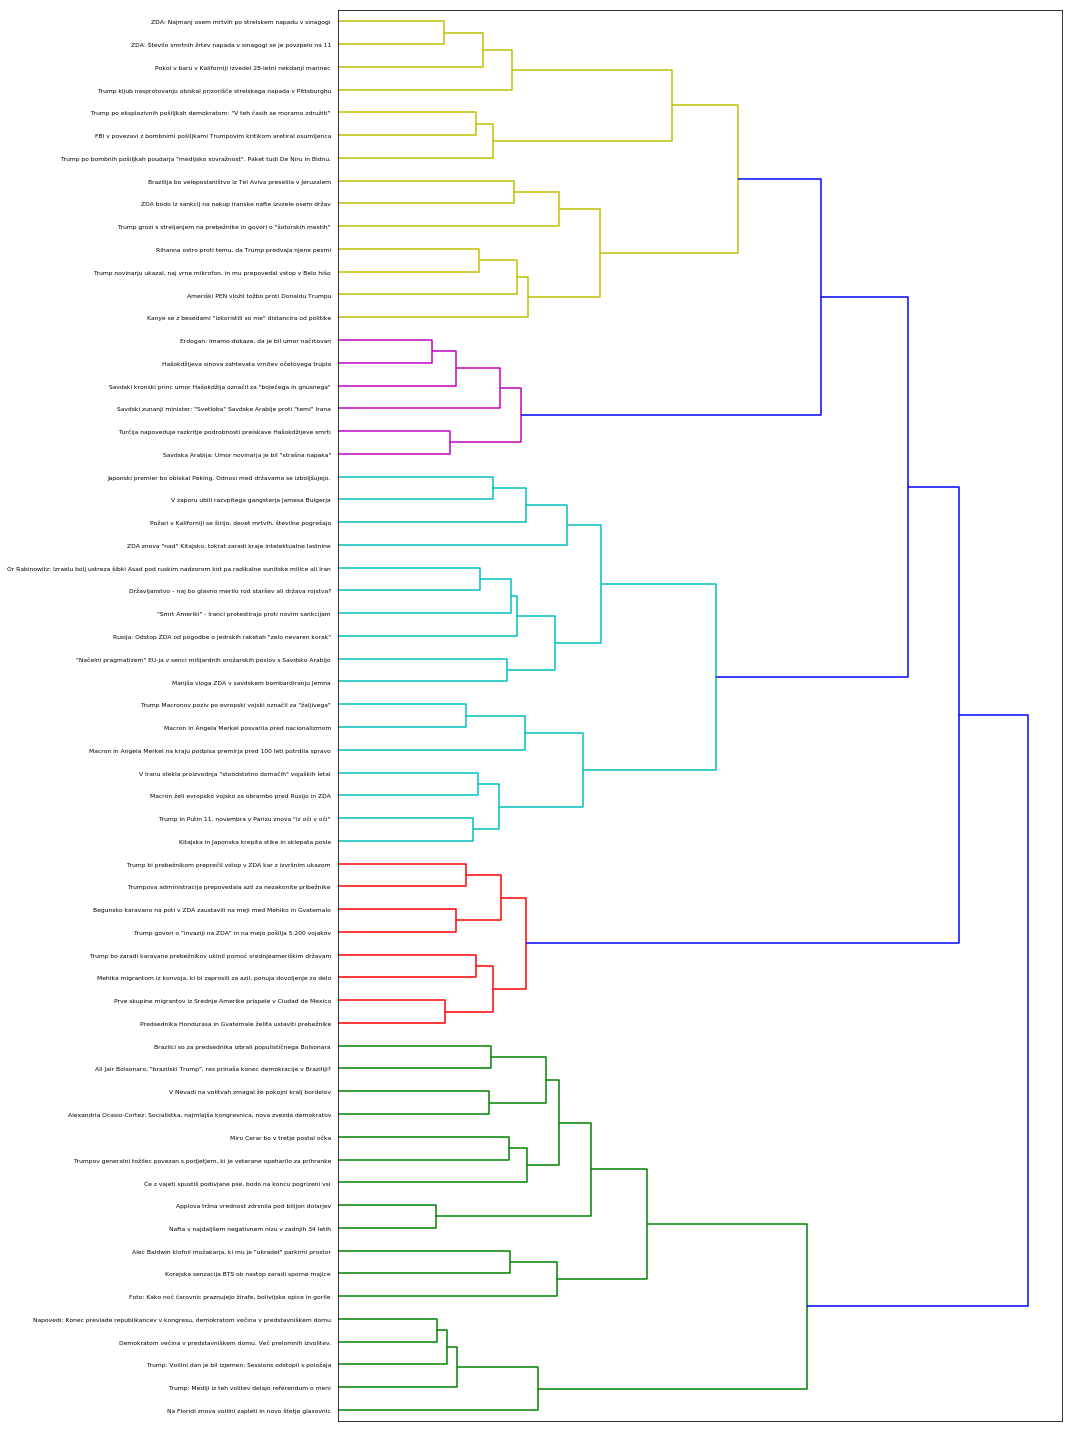

In [395]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

# Define the linkage_matrix using ward clustering pre-computed distances.
linkage_matrix = ward(dist_tokenizer) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=news_titles);

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

# Uncomment the below to show or save the plot.
plt.show()
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.close()

Hierarhično razvrščanje (ngram).

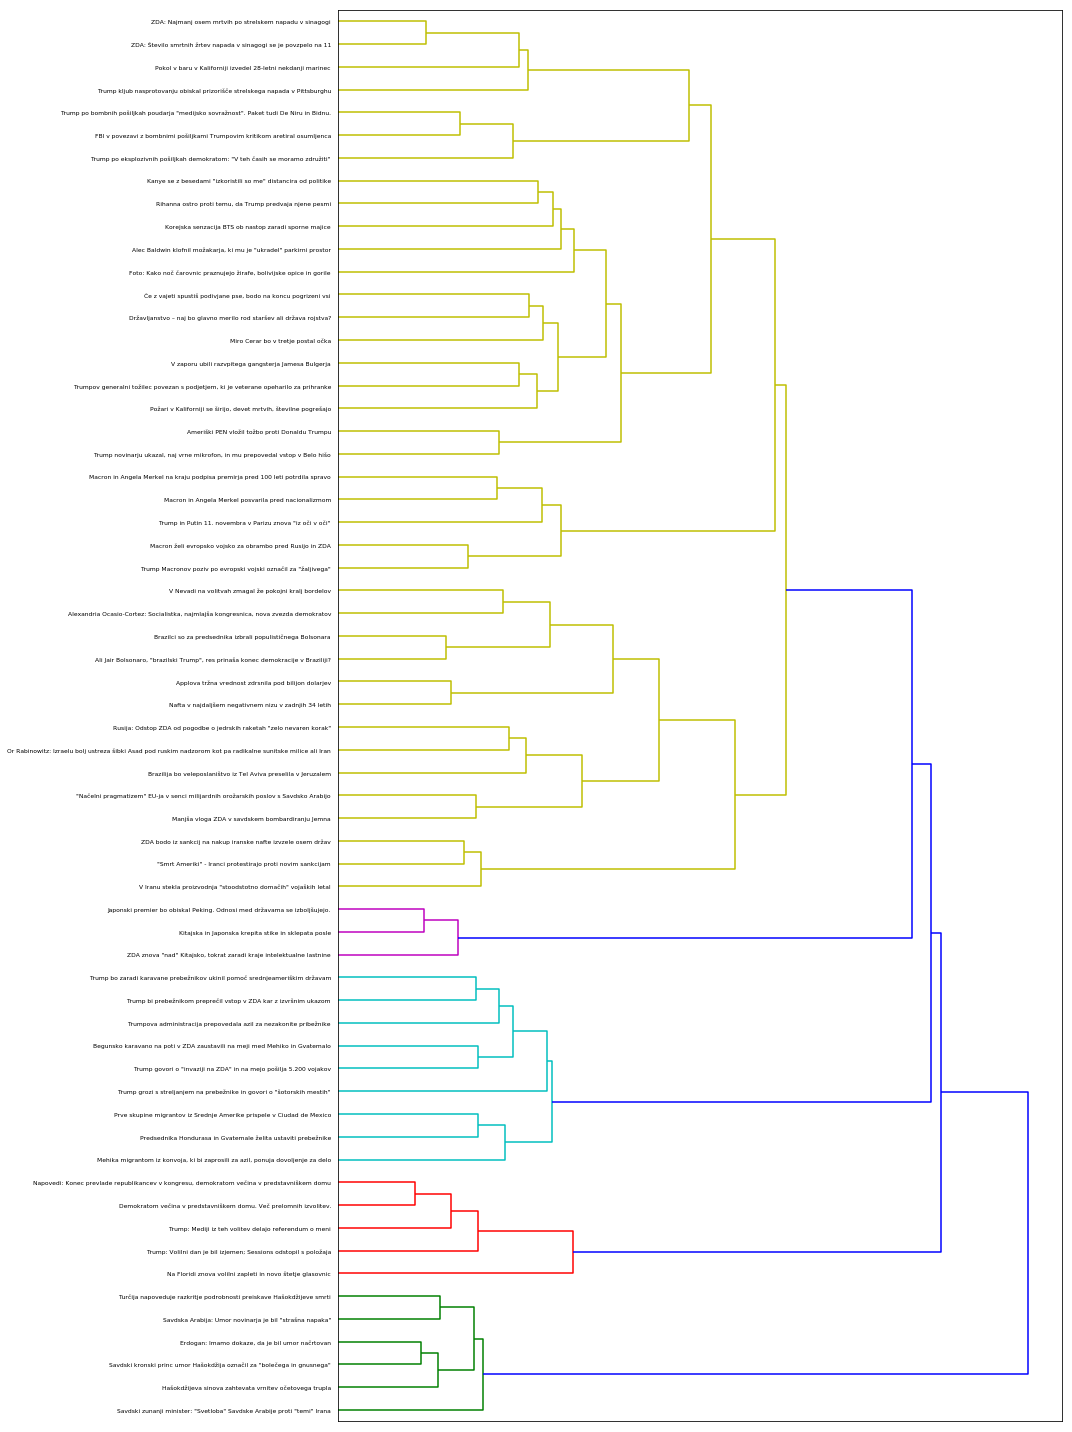

In [396]:
# Define the linkage_matrix using ward clustering pre-computed distances.
linkage_matrix = ward(dist_cngram) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=news_titles);

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

# Uncomment the below to show or save the plot.
plt.show()
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.close()

In [400]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix_tokenizer)

clusters = km.labels_.tolist()
print("Clusters: {}".format(clusters))
for i in range(num_clusters):
    print("CLUSTER " + str(i))
    for t,c in zip(news_titles, clusters):
        if c == i:
            print(t)
    print("")

Clusters: [1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 4, 0, 4, 2, 1, 1, 3, 2, 4, 1, 1, 4, 1, 0, 4, 2, 1, 1, 0, 0, 4, 2, 1, 1, 3, 0, 4, 0, 4, 4, 2, 0, 2, 0, 0, 1, 3, 4, 3, 2, 3, 4, 3, 2, 3]
CLUSTER 0
Pokol v baru v Kaliforniji izvedel 28-letni nekdanji marinec
Trump novinarju ukazal, naj vrne mikrofon, in mu prepovedal vstop v Belo hišo
Rihanna ostro proti temu, da Trump predvaja njene pesmi
ZDA bodo iz sankcij na nakup iranske nafte izvzele osem držav
Trump kljub nasprotovanju obiskal prizorišče strelskega napada v Pittsburghu
Kanye se z besedami "izkoristili so me" distancira od politike
ZDA: Število smrtnih žrtev napada v sinagogi se je povzpelo na 11
ZDA: Najmanj osem mrtvih po strelskem napadu v sinagogi
FBI v povezavi z bombnimi pošiljkami Trumpovim kritikom aretiral osumljenca
Trump po bombnih pošiljkah poudarja "medijsko sovražnost". Paket tudi De Niru in Bidnu.
Trump po eksplozivnih pošiljkah demokratom: "V teh časih se moramo združiti"

CLUSTER 1
Na Floridi znova volil

Če poženemo K-Means s tremi clustri, vidimo, da novice v grobem razvrsti v tri smeselne kategorije: volitve, migranti, umori.

Pet clustrov: volitve, migranti, svet, Savdska Arabija/Iran, umori.

Če uporabimo n-gram, so clustri bolj izraziti in neuravnoteženi. (Rezultati niso vedno enaki).

Poglejmo še sentiment novic posameznega clustra.

In [401]:
for i in range(num_clusters):
    print("CLUSTER " + str(i))
    cluster_sentiment = 0
    for t,s,c in zip(news_titles, news_sentiment, clusters):
        if c == i:
            cluster_sentiment += s
    print("Sentiment: " + str(cluster_sentiment))

CLUSTER 0
Sentiment: 95
CLUSTER 1
Sentiment: 360
CLUSTER 2
Sentiment: 95
CLUSTER 3
Sentiment: 190
CLUSTER 4
Sentiment: 443


Enako, le da gledamo sentiment komentarjev.

In [402]:
comment_sentiment_aggregated = [sum(x)/len(x) for x in comment_sentiment]
for i in range(num_clusters):
    print("CLUSTER " + str(i))
    cluster_sentiment = 0
    for t,s,c in zip(news_titles, comment_sentiment_aggregated, clusters):
        if c == i:
            cluster_sentiment += s
    print("Sentiment: " + str(cluster_sentiment))

CLUSTER 0
Sentiment: 7.392857142857142
CLUSTER 1
Sentiment: 25.401968864468866
CLUSTER 2
Sentiment: 12.350000000000001
CLUSTER 3
Sentiment: 5.975
CLUSTER 4
Sentiment: 21.27777777777778
